<h2> Profitable App profiles for the App Store and Google Play Markets

our aim is to help our developers understand what type of apps are likely to attract more users on Google Play and the App Store. To do this, we'll need to collect and analyze data about mobile apps available on Google Play and the App Store.

As of September 2018, there were approximately 2 million iOS apps available on the App Store, and 2.1 million Android apps on Google Play.
We will analyze a sample of this data:
10K Android Apps - https://dq-content.s3.amazonaws.com/350/googleplaystore.csv

7K iOS apps - https://dq-content.s3.amazonaws.com/350/AppleStore.csv

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
apple = pd.read_csv('AppleStore.csv')
google = pd.read_csv('googleplaystore.csv')

In [6]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

In [7]:
apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [8]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<h3> Data Cleaning</h3>

In [14]:
print(google.iloc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object


Since this row has a shift in some of the dara and other columns are missing we will remove it

In [19]:
google.drop(10472,axis=0,inplace=True)

Now we will remove dupliacte apps and keep only the latest one with the most ratings / Reviews by users per each duplicate app

In [21]:
unique_google_app_names = set(google['App'])
print(len(unique_google_app_names))

9659


out of the total 10840 ros, we only have 9659 unique apps. the rest are duplicates so we need to remove them. we will sort by ratings and keep the top row per each app

In [23]:
google = google.sort_values('Reviews', ascending=False)
google = google.drop_duplicates(subset='App', keep='first')


In [24]:
print(google.shape)

(9659, 13)


In [25]:
unique_app_names = set(apple['track_name'])
print(len(unique_app_names))

7195


In [26]:
apple = apple.sort_values('rating_count_tot', ascending=False)
apple = apple.drop_duplicates(subset='track_name', keep='first')

In [27]:
print(apple.shape)

(7195, 16)


Check for foreign  app names and remove them because we want to focus on English speaking market only

In [32]:
def detect_foreign_chars(app_name):
    tot_chars = 0
    for letter in app_name:
        if ord(letter) > 127: # ascii code for non english letters
            tot_chars +=1
    if tot_chars < 3:
        return 0
    else:
        return 1
    

In [33]:
google['foreign'] = google['App'].apply(detect_foreign_chars)

In [34]:
google['foreign'].value_counts()

0    9597
1      62
Name: foreign, dtype: int64

In [35]:
clean_google = google[google['foreign']==0]

In [36]:
apple['foreign'] = apple['track_name'].apply(detect_foreign_chars)

In [37]:
apple['foreign'].value_counts()

0    6153
1    1042
Name: foreign, dtype: int64

In [38]:
clean_apple = apple[apple['foreign']==0]

now we will take only the free apps since our business model works on ads appearing in free apps users are downloading

In [41]:
free_google = clean_google[clean_google['Type'] == 'Free']
free_apple = clean_apple[clean_apple['price']==0.0]

In [42]:
print(free_google.shape)
print(free_apple.shape)

(8845, 14)
(3201, 17)


In [67]:
free_google['Installs'] = free_google['Installs'].str.replace('+',"")
free_google['Installs'] = free_google['Installs'].str.replace(',',"")
free_google['Installs'] = free_google['Installs'].astype(int)

<ipython-input-67-362c1dddb9fd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-362c1dddb9fd>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-67-362c1dddb9fd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<h3>Analysis</h3>

After the data has been cleaned, we can check the most popular apps

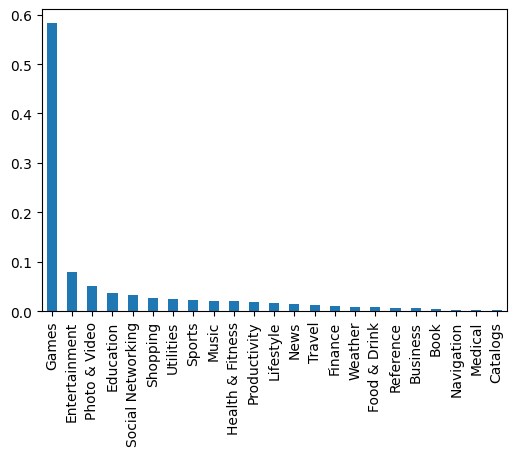

In [53]:
free_apple['prime_genre'].value_counts(normalize=True).plot.bar();

Looking in the apple store the most dominant category for free apps is by far - Games with 58% and after that with a huge drop- Entertainment with 8% and photo/videos

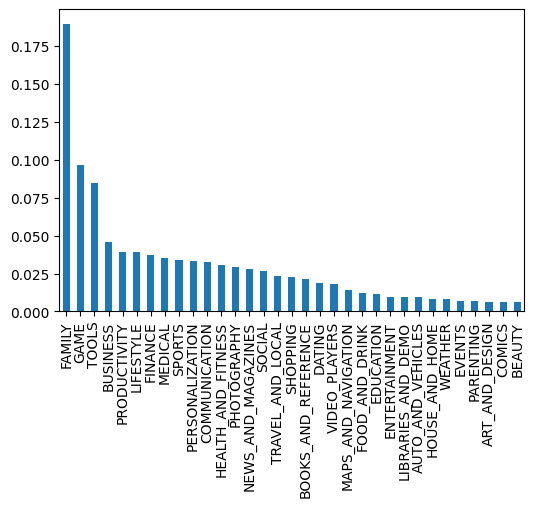

In [54]:
free_google['Category'].value_counts(normalize=True).plot.bar();

Looking at free google apps the top category is defined as 'Family' and after that we have game and tools. We need to better understand what does it mean 'Family' so we will take a look at some of the apps in this category and then look also in column Genres

In [46]:
print(free_google[free_google['Category']=='FAMILY'])

                                                    App Category  Rating  \
7002   Adult Color by Number Book - Paint Mandala Pages   FAMILY     4.3   
5326                                      Al jazeera TV   FAMILY     4.6   
6996               Art Pixel Coloring. Color by Number.   FAMILY     4.5   
4840                              Z-Empire: Dead Strike   FAMILY     4.6   
7826                                  CS Interview FAQs   FAMILY     4.3   
...                                                 ...      ...     ...   
9714                                           EP Music   FAMILY     NaN   
5835  25 Mins Ako ay may lobo Etc Pinoy Kid Song Off...   FAMILY     NaN   
5837             Ako ay may lobo Pinoy Kid Song Offline   FAMILY     NaN   
5843                           Mehmet Emin Ay İlahileri   FAMILY     NaN   
9902                                         EU WHO War   FAMILY     NaN   

     Reviews                Size  Installs  Type Price Content Rating  \
7002     997  

Looks like Family category is mainly for kids games and entertainment. Other than that it seems google users have more apps for business, toosl and roductivity while apple users have more apps for games , fun and entertainment

In [55]:
google_top10_genres = free_google['Genres'].value_counts(normalize=True).head(10)


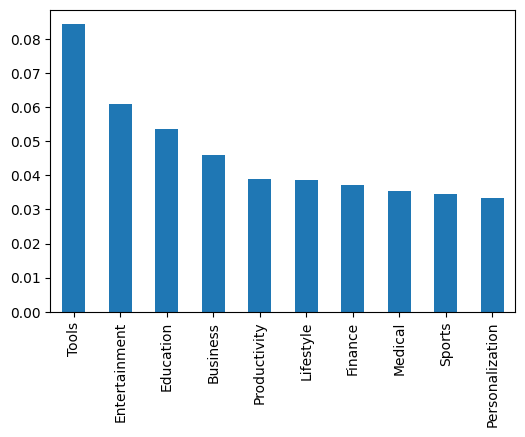

In [56]:
google_top10_genres.plot.bar();

So according to the Genres the top category is Tools, followed by entertainment and education

Let's look at the Genres per ratings and number of users / reviews

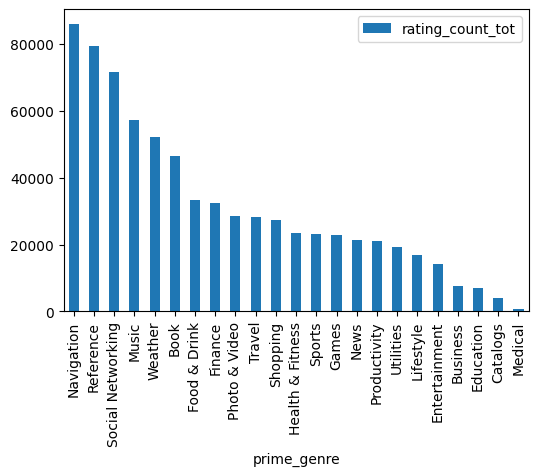

In [71]:
apple_rating_count_pivot = free_apple.pivot_table(values=['rating_count_tot'],index=['prime_genre'],aggfunc=np.mean)
apple_rating_count_pivot.sort_values('rating_count_tot', ascending=False,inplace=True)
apple_rating_count_pivot.plot.bar();

If we look at the total number of users by using a proxy of th rating counts (since we don't have the real number of users) we can see that navigation and social networking have on average the moset users which is not surprising but we have Reference on the second place which is interesting snd music on number 4.

In [74]:
print(free_apple[free_apple['prime_genre']=='Reference'])

              id                                         track_name  \
6      282935706                                              Bible   
90     308750436              Dictionary.com Dictionary & Thesaurus   
335    364740856     Dictionary.com Dictionary & Thesaurus for iPad   
551    414706506                                   Google Translate   
715    388389451  Muslim Pro: Ramadan 2017 Prayer Times, Azan, Q...   
738   1130829481  New Furniture Mods - Pocket Wiki & Game Tools ...   
757    399452287                         Merriam-Webster Dictionary   
913    475772902                                          Night Sky   
1106  1135575003  City Maps for Minecraft PE - The Best Maps for...   
1451  1132715891  LUCKY BLOCK MOD ™ for Minecraft PC Edition - T...   
2280  1137683736    GUNS MODS for Minecraft PC Edition - Mods Tools   
2766  1133678984  Guides for Pokémon GO - Pokemon GO News and Ch...   
2844   640199958                                               WWDC   
2895  

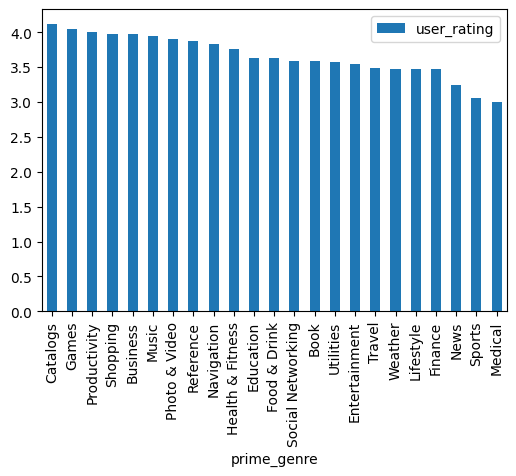

In [62]:
apple_rating_pivot = free_apple.pivot_table(values=['user_rating'],index=['prime_genre'],aggfunc=np.mean)
apple_rating_pivot.sort_values('user_rating', ascending=False,inplace=True)
apple_rating_pivot.plot.bar();

Looking at the ratings users have given per Gnre we see Catalogs take the first place, second is Games and third productivity.
So after considering all this it looks like Apple Users will likely response best to a free Game app.

What about Goole Users?

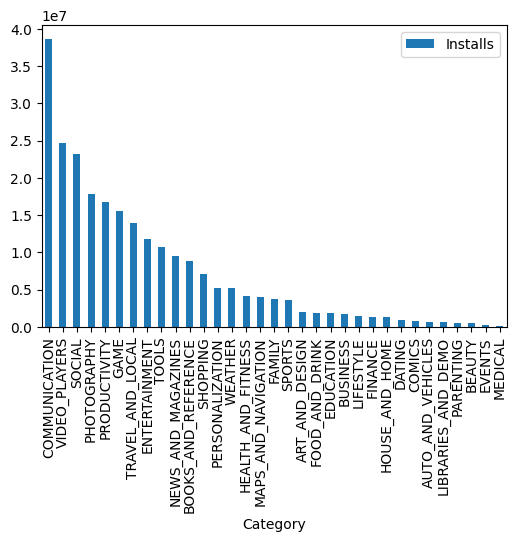

In [72]:
google_installs_pivot = free_google.pivot_table(values=['Installs'],index=['Category'],aggfunc=np.mean)
google_installs_pivot.sort_values('Installs', ascending=False,inplace=True)
google_installs_pivot.plot.bar();

We see communication as the number one category in terms of usage. second place is video players and third - social.

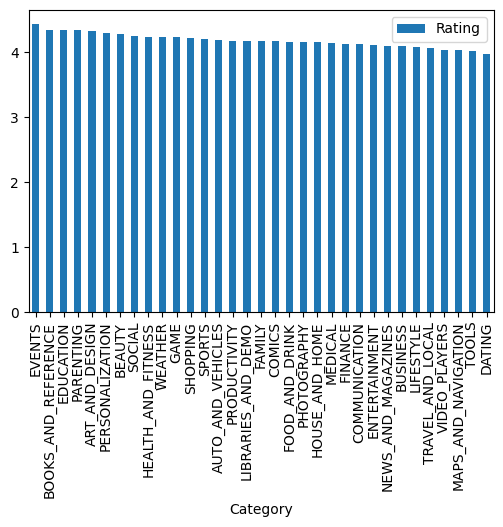

In [69]:
google_rating_pivot = free_google.pivot_table(values=['Rating'],index=['Category'],aggfunc=np.mean)
google_rating_pivot.sort_values('Rating', ascending=False,inplace=True)
google_rating_pivot.plot.bar();

Here we can see that there is not much difference in the ratings of the different categories so we will stick with the number of installations as our proxy.

So to conclude, it seems like games is a popular choice but the market is very saturated. Maybe look into the productivity / Reference area and create some kind of an app that will help users in a specific area of their life or for a community abut books in general in which user can connect and recommend other uers about books / sites in their prefered area of interest.
